* <a href="https://colab.research.google.com/github/4dsolutions/clarusway_data_analysis/blob/main/Kirby%20Notebooks/uber_magic_square.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a><br/>
* <a href="https://nbviewer.org/github/4dsolutions/clarusway_data_analysis/blob/main/Kirby%20Notebooks/uber_magic_square.ipynb"><img align="left" src="https://raw.githubusercontent.com/jupyter/design/master/logos/Badges/nbviewer_badge.svg" alt="Open in nbviewer" title="Open and View using nbviewer"></a>


Landing Pages:
* [Data Visualization](../DVwPY_S1/daily_schedule.ipynb)
* [Data Analysis with Python](../DAwPy_S1_%28Numpy_Arrays%29/daily_schedule.ipynb)
* [Basic Python](../basic_python/landing_page.ipynb)
* [Cascadian Synergetics](https://github.com/4dsolutions/School_of_Tomorrow/blob/master/CascadianSynergetics.ipynb)

# A Trimagic Square

You've likely heard of a magic square. A square of positive integers that add up to the same sum along all rows, all columns, and both diagonals.

A bimagic square is a magic square that continues to work if all the numbers in the original are raised the the 2nd power.

A trimagic square works with all original numbers raised to both the 2nd and 3rd power.

Some magic squares might work for an nth power only.  No one has found a 3 x 3 magic square of all unique 2nd powers.  People have come pretty close (all but one diagonal).

Below we look at a magic square developed by Gaston Tarry (Villefranche de Rouergue 1843 - Le Havre 1913) of 128 by 128 numbers that is trimagic.  

Here's [a web page about it](http://www.multimagie.com/English/Trimagic128.htm).

What is the strict definition of a Magic Square?  

Let's [ask a chatbot](https://www.perplexity.ai/search/what-is-the-strict-definition-RxVsxCZxRc2GT_r3SlHuOA):

A magic square is a square array of numbers, typically positive integers, with the following properties:

1. It contains n^2 distinct numbers arranged in an n×n grid[3][4].
2. The sum of the numbers in each row, each column, and both main diagonals is the same[1][3].
3. This constant sum is called the "magic constant" or "magic sum"[2][3].

For a "normal" magic square, the numbers used are the consecutive integers from 1 to n^2[3]. The magic constant M for a normal magic square of order n is given by the formula:

$$M = \frac{n(n^2 + 1)}{2}$$[2]

It's important to note that some definitions may vary slightly, but these core properties are consistently recognized across mathematical literature.

Citations:
1.  https://www.youtube.com/watch?v=guij50IbCyY
2.  https://byjus.com/maths/magic-square/
3.  https://en.wikipedia.org/wiki/Magic_squares
4.  https://web.mae.ufl.edu/uhk/MAGIC-SQUARE.pdf
5.  https://testbook.com/maths/magic-square
6.  https://www.proquest.com/docview/231164727
7.  https://proofwiki.org/wiki/Definition:Magic_Square

In [1]:
from IPython.display import YouTubeVideo

...and a Numberphile video that catches us up on the state of the art more generally.

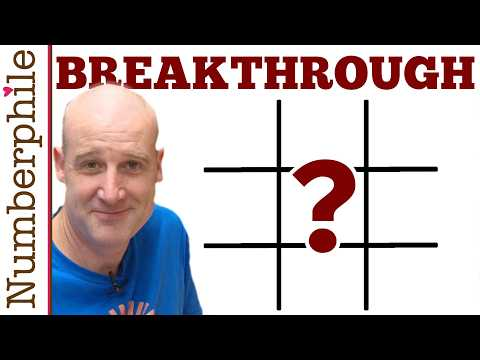

In [2]:
YouTubeVideo("stpiBy6gWOA")

Now lets use pandas to verify that Gaston Tarry's solution is everything it purports to be.  We know the audit, done correctly, should confirm his result, so this is mainly an exercise in learning pandas and numpy.

In [3]:
import sys
sys.version

'3.11.3 | packaged by conda-forge | (main, Apr  6 2023, 09:05:00) [Clang 14.0.6 ]'

In [4]:
import pandas as pd
import numpy as np

The zip file from the above web page contains all three magic squares. I copy pasted the first one to a separate Google sheet, after uploading the uncompressed xls file. I saved it in CSV format as tarry_magic.csv for reading in.

In [5]:
df = pd.read_csv("tarry_magic.csv", header=None)

In [6]:
df

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,16132,130,16381,127,16128,382,15873,387,13632,2750,...,5648,10638,4401,11955,4560,11854,4301,12111,4148,12210
1,128,16382,129,16131,388,15874,381,16127,2628,13762,...,10612,5874,11853,4559,11956,4402,12209,4147,12112,4302
2,16002,260,15999,509,16254,256,16259,1,13502,2880,...,6030,10256,4275,12081,4174,12240,4431,11981,4530,11828
3,510,16000,259,16001,2,16260,255,16253,3010,13380,...,10482,6004,12239,4173,12082,4276,11827,4529,11982,4432
4,257,16003,512,15998,253,16255,4,16258,2877,13503,...,10253,6031,12084,4274,12237,4175,11984,4430,11825,4531
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,4642,11684,4831,11613,5086,11360,4899,11425,1566,14752,...,15110,1160,8763,7609,8902,7496,9159,7237,9018,7356
124,4829,11615,4644,11682,4897,11427,5088,11358,1761,14691,...,15353,1147,8904,7494,8761,7611,9020,7354,9157,7239
125,11681,4643,11616,4830,11357,5087,11428,4898,14749,1567,...,1157,15111,7612,8762,7493,8903,7240,9158,7353,9019
126,4959,11485,5026,11300,4771,11553,4702,11744,1891,14561,...,14971,1529,9030,7368,9147,7225,8890,7484,8775,7621


The zero-axis of a DataFrame is top-to-bottom, row-wise travel, ending up with summary data in this case. All totals should be the same, yet not all are displayed. This is just a preliminary check.

In [7]:
df.sum(axis=0)  # verify column sums (row-wise travel)

0      1048640
1      1048640
2      1048640
3      1048640
4      1048640
        ...   
123    1048640
124    1048640
125    1048640
126    1048640
127    1048640
Length: 128, dtype: int64

The chatbot said the sum associated with a Magic Square is usually the triangular number associated with its dimensions. That won't be true of the 2nd and 3rd power versions, as the 128 stays fixed.  But for the 1st power version, shown above, the result is as expected.

In [8]:
128 * (128 ** 2 + 1) // 2

1048640

In [9]:
from random import shuffle
r = list(range(1, 101)) # 1 to 100
shuffle(r)
test_df = pd.DataFrame(np.array(r).reshape(10,10))
test_df # not magic

,0,1,2,3,4,5,6,7,8,9
0,3,64,19,49,12,58,79,5,24,42
1,60,7,95,8,9,98,67,71,54,30
2,56,1,66,85,65,80,16,2,51,83
3,6,74,73,22,52,81,75,89,47,59
4,33,88,13,39,50,82,36,4,84,28
5,32,40,10,20,92,70,35,37,17,46
6,14,27,25,18,21,100,61,77,63,90
7,26,31,97,41,29,99,91,57,68,48
8,87,76,62,55,43,45,94,15,96,72
9,93,44,78,38,86,53,23,34,11,69


In [10]:
test_df.agg('unique') # aggregates all unique entries in the entire DataFrame

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100])

In [11]:
len(df.agg('unique')) == 128 ** 2 # proves every cell in the magic square contains a unique number

True

In [12]:
(df.sum(axis=1) == 1048640).count() # verify row sums (column-wise travel)

128

I asked Gemini in Google colab to write a demo program whereby it extracted both 

* top left to bottom right, and
* bottom left to top right diagonals

from a 10 x 10 pandas Dataframe. The first diagonal is easily available, whereas the second is a little tricky, which is why I asked for Gemini's help.

In [13]:
main_diagonal = np.diag(df)
sum(main_diagonal)

1048640

In [14]:
anti_diagonal = np.diag(np.fliplr(df))  # thank you Gemini
sum(anti_diagonal)

1048640

OK now it's time to 2nd and 3rd power the original magic square and audit the results.

In [15]:
df2 = df**2  # df2 is 2nd power square

In [16]:
df2.sum(axis=0)

0      11454294720
1      11454294720
2      11454294720
3      11454294720
4      11454294720
          ...     
123    11454294720
124    11454294720
125    11454294720
126    11454294720
127    11454294720
Length: 128, dtype: int64

In [17]:
print(
    (df2.sum(axis=1) == 11454294720).count()==128,
    (df2.sum(axis=1) == 11454294720).count()==128,
    sum(np.diag(df2)) == 11454294720,
    sum(np.diag(np.fliplr(df2))) == 11454294720)

True True True True


In [18]:
df3 = df ** 3  # df3 is 3rd power square

In [19]:
df3.sum(axis=0)

0      140754668748800
1      140754668748800
2      140754668748800
3      140754668748800
4      140754668748800
            ...       
123    140754668748800
124    140754668748800
125    140754668748800
126    140754668748800
127    140754668748800
Length: 128, dtype: int64

In [20]:
print(
    (df3.sum(axis=1) == 140754668748800).count()==128,
    (df3.sum(axis=1) == 140754668748800).count()==128,
    sum(np.diag(df3)) == 140754668748800,
    sum(np.diag(np.fliplr(df3))) == 140754668748800)

True True True True


Sharing about this NB [on edu-sig](https://mail.python.org/archives/list/edu-sig@python.org/message/O2ITTCYXZXUA3HTCIYF6TRQGGTVO3FF3/) @ Python.org

Sharing on Facebook:

<a data-flickr-embed="true" href="https://www.flickr.com/photos/kirbyurner/54330099244/in/dateposted/" title="Magic Squares"><img src="https://live.staticflickr.com/65535/54330099244_154c9146f3.jpg" width="500" height="470" alt="Magic Squares"/></a><script async src="//embedr.flickr.com/assets/client-code.js" charset="utf-8"></script>

More Python teaching ideas:

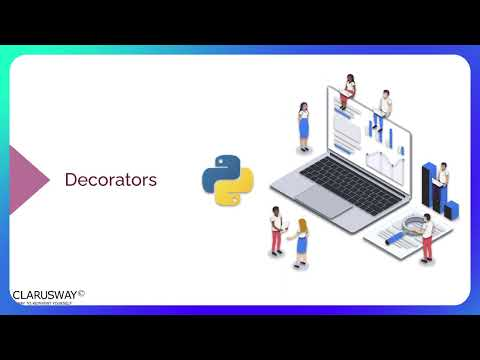

In [21]:
YouTubeVideo("9sMawhe6glU")